## **Working with Geospatial Data – Session 1**  

In this lesson, we're going to install and execute basic commands to work with Pandas and GeoPandas. We will also explore the functionality of Polygons in geospatial data.

GeoPandas is an extension of Pandas designed to work with spatial data. It allows us to handle geometric objects like Points, Lines, and Polygons, making it easier to analyze and visualize geographic information.

In [1]:
pip install geopandas -q


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas

pandas.__version__

'2.2.3'

In [3]:
import geopandas  

geopandas.__version__

'1.0.1'

In [4]:
import pandas as pd

In [5]:
import geopandas as gpd

### Creating a DataFrame with City Information  

We are creating a **DataFrame** using a dictionary that contains information about five major cities around the world. Each city is represented by different attributes:

- **`Name`** – The name of the city.
- **`Population`** – The approximate population of each city.
- **`Latitude` & `Longitude`** – The geographical coordinates of each city.

This dataset allows us to analyze and visualize spatial relationships between cities, such as their locations on a map and their population distribution.

By converting this dictionary into a **Pandas DataFrame**, we can efficiently manipulate and analyze the data, and later, we can integrate it into **GeoPandas** to work with spatial operations.


In [6]:
data = {
    "Name": ["New York City", "São Paulo", "Tokyo", "Lagos", "Sydney"],
    "Population": [8419600, 12325232, 13929286, 15000000, 5312163],  # Approximate populations
    "Latitude": [40.7128, -23.5505, 35.6895, 6.5244, -33.8688],
    "Longitude": [-74.0060, -46.6333, 139.6917, 3.3792, 151.2093]
}

In [7]:
type(data)

dict

In [8]:
data["Name"]

['New York City', 'São Paulo', 'Tokyo', 'Lagos', 'Sydney']

In [9]:
type(data["Name"])

list

In [10]:
data["Name"][1]

'São Paulo'

We are creating a data frame based on the structure we created previously 

In [11]:
cities_df = pd.DataFrame(data)

In [12]:
cities_df

,Name,Population,Latitude,Longitude
0,New York City,8419600,40.7128,-74.0060
1,São Paulo,12325232,-23.5505,-46.6333
2,Tokyo,13929286,35.6895,139.6917
3,Lagos,15000000,6.5244,3.3792
4,Sydney,5312163,-33.8688,151.2093


In [13]:
cities_df["Name"]

0    New York City
1        São Paulo
2            Tokyo
3            Lagos
4           Sydney
Name: Name, dtype: object

In [14]:
cities_df[["Name","Population"]]

,Name,Population
0,New York City,8419600
1,São Paulo,12325232
2,Tokyo,13929286
3,Lagos,15000000
4,Sydney,5312163


## GeoDataFrames and GeoSeries  

When working with **geospatial data** in Python, **GeoPandas** provides two essential data structures:  

### **1. GeoDataFrame**
A **GeoDataFrame** is an extension of a Pandas **DataFrame** designed to handle spatial data. It contains a special **"geometry"** column that stores geometric shapes such as **Points, Lines, and Polygons**. Each row in a GeoDataFrame represents a spatial feature with associated attributes.

#### **Key Features of GeoDataFrames:**
- Similar to Pandas **DataFrame** but with spatial capabilities.
- Stores geometries (points, lines, polygons) in a dedicated **geometry column**.
- Allows spatial operations like distance calculations, intersections, and transformations.
- Can be easily visualized with the `.plot()` function.

In [15]:
type(cities_df)

pandas.core.frame.DataFrame

In [16]:
## Converting a pandas DataFrame to a GeoDataFrame 
gdf = gpd.GeoDataFrame(cities_df, geometry= gpd.points_from_xy(cities_df['Longitude'], cities_df['Latitude']))

In [17]:
gdf

,Name,Population,Latitude,Longitude,geometry
0,New York City,8419600,40.7128,-74.0060,POINT (-74.006 40.7128)
1,São Paulo,12325232,-23.5505,-46.6333,POINT (-46.6333 -23.5505)
2,Tokyo,13929286,35.6895,139.6917,POINT (139.6917 35.6895)
3,Lagos,15000000,6.5244,3.3792,POINT (3.3792 6.5244)
4,Sydney,5312163,-33.8688,151.2093,POINT (151.2093 -33.8688)


In [18]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [19]:
gdf["geometry"]

0      POINT (-74.006 40.7128)
1    POINT (-46.6333 -23.5505)
2     POINT (139.6917 35.6895)
3        POINT (3.3792 6.5244)
4    POINT (151.2093 -33.8688)
Name: geometry, dtype: geometry

### **2. GeoSeries**
A **GeoSeries** is the building block of a **GeoDataFrame**. It is a specialized Pandas **Series** where each entry represents a geometric object. A GeoDataFrame’s **geometry column** is essentially a **GeoSeries**.

#### **Key Features of GeoSeries:**
- Each element is a geometric object (Point, Line, Polygon).
- Supports spatial operations such as buffering, centroid calculation, and coordinate transformation.
- Can be created independently or as part of a GeoDataFrame.

In [20]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

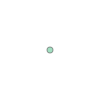

In [21]:
gdf["geometry"][0]

In [22]:
type(gdf["geometry"][0])

shapely.geometry.point.Point

## Polygons

A **polygon** is a closed geometric shape made up of multiple **connected** line segments, where the first and last points are the same. Polygons represent **areas** in geospatial data and are commonly used to model geographic regions such as **countries, states, lakes, buildings, and land parcels**.

### **Structure of a Polygon**
A polygon consists of:
1. **A series of coordinate points (vertices)**
2. **Edges that connect the vertices**
3. **A closed boundary** (the first and last point are the same)
4. **An interior area** enclosed by the boundary

In [23]:
wisconsin = 'POLYGON((-90.41561 46.568478, -90.41561 45.202784, -87.020588 45.202784, -87.020588 46.568478, -90.41561 46.568478))'

In [24]:
data = {
    "Name": ["Wisconsin"],
    "Population": [5911000],
    "geometry": [wisconsin]
}

In [25]:
gdf = gpd.GeoDataFrame(data)

In [26]:
gdf.head()

,Name,Population,geometry
0,Wisconsin,5911000,"POLYGON((-90.41561 46.568478, -90.41561 45.202..."


In [27]:
gdf["geometry"][0]

'POLYGON((-90.41561 46.568478, -90.41561 45.202784, -87.020588 45.202784, -87.020588 46.568478, -90.41561 46.568478))'

In [28]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries.from_wkt(gdf['geometry']))

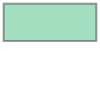

In [29]:
gdf["geometry"][0]

In [30]:
type(gdf["geometry"][0])

shapely.geometry.polygon.Polygon